## Exploratory Data Analysis

In this notebook we perform a structured EDA to understand and prepare the Spotify track metadata before diving into modeling:

1. **Feature Distributions**  
   - Plot histograms for each numeric variable to assess skew, range and outliers  
   - Visualize track counts by year to understand temporal coverage  

2. **Feature Relationships**  
   - Display a correlation matrix to identify strongly coupled features  
   - Scatter‐plot key pairs (e.g. Energy vs. Popularity, Danceability vs. Valence)  

3. **Dimensionality Preview**  
   - Perform a 2-component PCA on audio features to reveal inherent structure and clustering potential  

4. **Summary Statistics & Column Exploration**  
   - Compute per‐column data types, unique counts and percentage of missing values  
   - Review `describe()` output to check central tendencies, dispersion and outliers  

These steps ensure we have a clear view of data quality, coverage and underlying patterns, guiding the design of our downstream notebooks on clustering, popularity prediction and content-based recommendation.  


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [22]:
df = pd.read_csv('spotify_data.csv')
print(df.head)

<bound method NDFrame.head of          Unnamed: 0      artist_name                         track_name  \
0                 0       Jason Mraz                    I Won't Give Up   
1                 1       Jason Mraz                   93 Million Miles   
2                 2    Joshua Hyslop                   Do Not Let Me Go   
3                 3     Boyce Avenue                           Fast Car   
4                 4     Andrew Belle                   Sky's Still Blue   
...             ...              ...                                ...   
1159759     1473391     Nicola Conte                      Black Spirits   
1159760     1473392     Nicola Conte                         Quiet Dawn   
1159761     1473393       Amon Tobin                  Morning Ms Candis   
1159762     1473394  Peace Orchestra      Happy Christmas (War Is Over)   
1159763     1473395     Mo' Horizons  Hit the Road Jack (Pé Na Éstrada)   

                       track_id  popularity  year     genre  danceabi

In [23]:
audio_features = [
    'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature', 'duration_ms'
]
all_features = ['popularity', 'year'] + audio_features


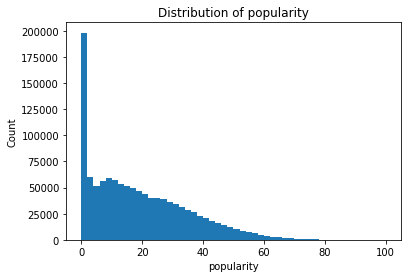

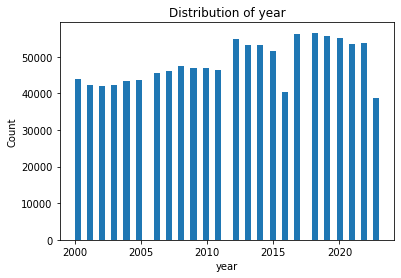

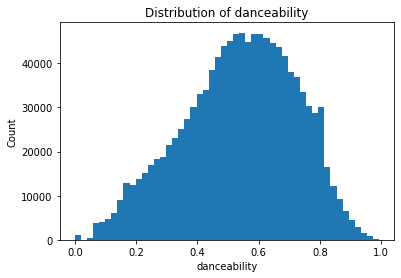

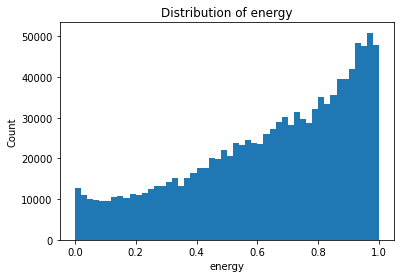

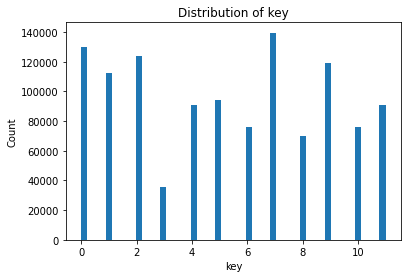

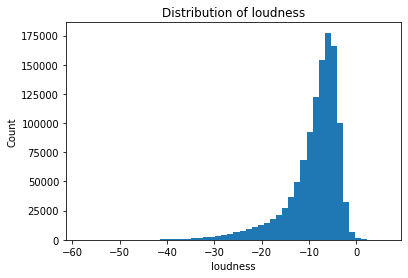

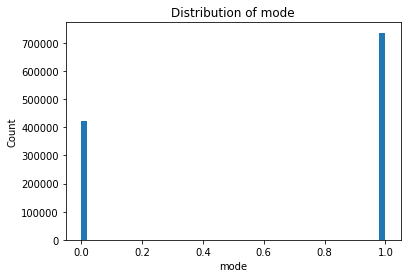

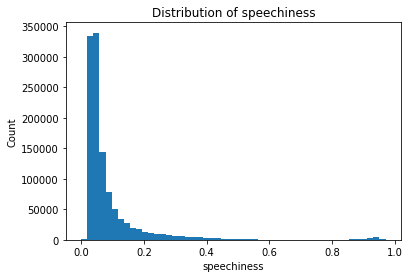

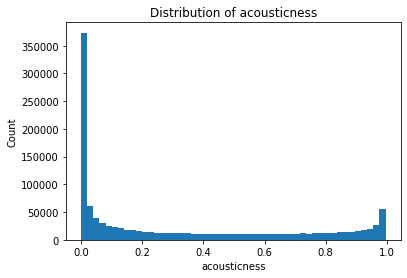

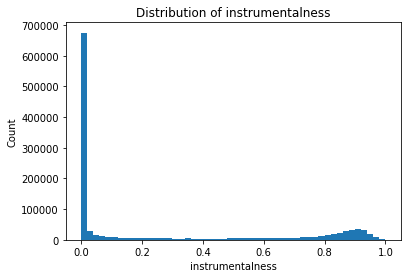

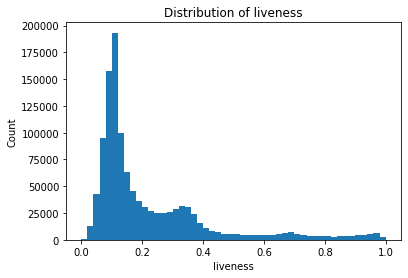

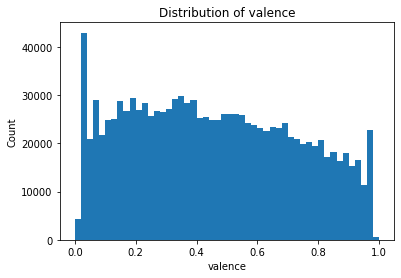

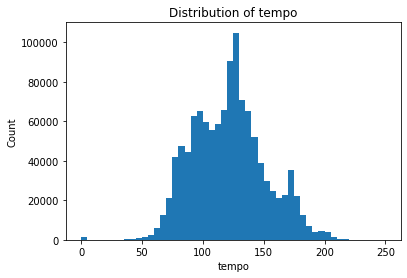

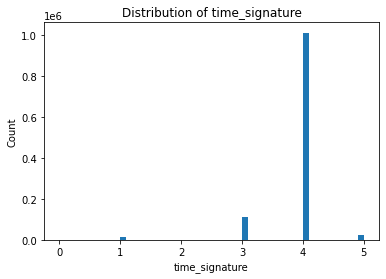

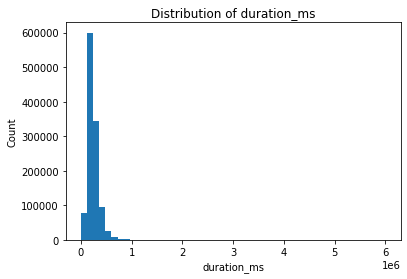

In [24]:
# 3) Histograms for each feature
for col in all_features:
    plt.figure()
    plt.hist(df[col].dropna(), bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

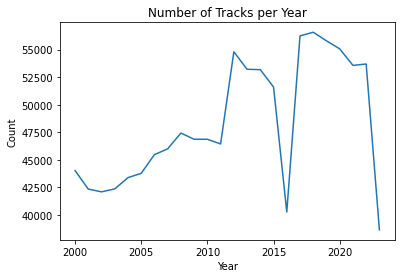

In [25]:
# 4) Tracks per year (line plot)
year_counts = df['year'].value_counts().sort_index()
plt.figure()
plt.plot(year_counts.index, year_counts.values)
plt.title('Number of Tracks per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

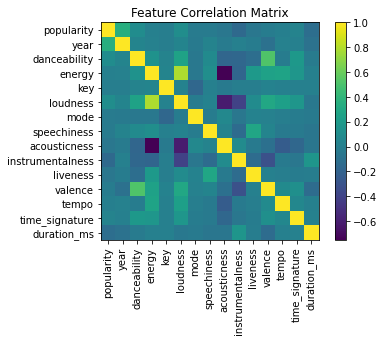

In [26]:
# 5) Correlation matrix of all numeric features
corr = df[all_features].corr()
plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Feature Correlation Matrix')
plt.show()

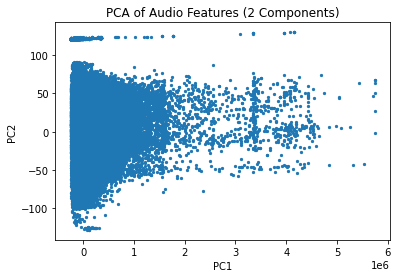

In [27]:
# 6) Quick PCA on audio features (for clustering prep)
pca = PCA(n_components=2)
X = df[audio_features].dropna()
pca_coords = pca.fit_transform(X)
plt.figure()
plt.scatter(pca_coords[:,0], pca_coords[:,1], s=5)
plt.title('PCA of Audio Features (2 Components)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


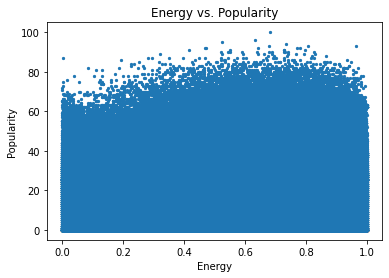

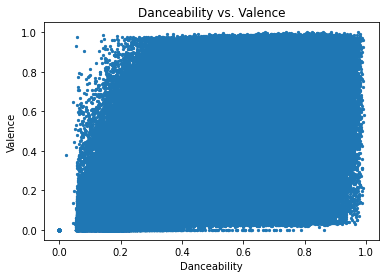

In [28]:
# 7) Example pairwise scatters for modeling insights
plt.figure()
plt.scatter(df['energy'], df['popularity'], s=5)
plt.title('Energy vs. Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()

plt.figure()
plt.scatter(df['danceability'], df['valence'], s=5)
plt.title('Danceability vs. Valence')
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.show()


In [29]:
def df_explore(df):
    missing = (
        pd.DataFrame((df.isna().sum() / df.shape[0]) * 100)
          .reset_index()
          .rename(columns={'index': 'column', 0: '%_missing'})
          .sort_values('%_missing', ascending=False)
    )
    nunique = (
        pd.DataFrame(df.nunique())
          .reset_index()
          .rename(columns={'index': 'column', 0: 'nunique'})
          .sort_values('nunique', ascending=False)
    )
    dtypes = (
        pd.DataFrame(df.dtypes)
          .reset_index()
          .rename(columns={'index': 'column', 0: 'dtype'})
    )
    # merge into one summary table
    summary = (
        dtypes
          .merge(missing, on='column')
          .merge(nunique, on='column', how='left')
    )
    return summary[['column', 'dtype', 'nunique', '%_missing']]

# 2) Load your data
df_main = pd.read_csv('spotify_data.csv')

# 3) Quick shape check
print(f"Dataset shape: {df_main.shape}\n")

# 4) DataFrame info
print("=== DataFrame Info ===")
df_main.info()
print("\n")

# 5) Descriptive statistics (numeric cols)
print("=== Descriptive Statistics ===")
display(df_main.describe().transpose())

# 6) Column-wise summary (dtype, unique count, % missing)
print("=== Column Exploration ===")
display(df_explore(df_main))

Dataset shape: (1159764, 20)

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1159764.0,659061.321913,428549.153571,0.0,289940.750000,579881.50000,1031689.250,1473395.000
popularity,1159764.0,18.383123,15.885545,0.0,5.000000,15.00000,29.000,100.000
year,1159764.0,2011.955000,6.803901,2000.0,2006.000000,2012.00000,2018.000,2023.000
danceability,1159764.0,0.537438,0.184478,0.0,0.413000,0.55000,0.677,0.993
energy,1159764.0,0.639670,0.270501,0.0,0.454000,0.69400,0.873,1.000
key,1159764.0,5.287778,3.555197,0.0,2.000000,5.00000,8.000,11.000
loudness,1159764.0,-8.981353,5.682215,-58.1,-10.829000,-7.45000,-5.276,6.172
mode,1159764.0,0.634653,0.481527,0.0,0.000000,1.00000,1.000,1.000
speechiness,1159764.0,0.092815,0.126841,0.0,0.037100,0.05070,0.089,0.971
acousticness,1159764.0,0.321537,0.354987,0.0,0.006400,0.14700,0.640,0.996


=== Column Exploration ===


,column,dtype,nunique,%_missing
0,Unnamed: 0,int64,1159764,0.000000
1,artist_name,object,64158,0.001293
2,track_name,object,882360,0.000086
3,track_id,object,1159764,0.000000
4,popularity,int64,98,0.000000
5,year,int64,24,0.000000
6,genre,object,82,0.000000
7,danceability,float64,1364,0.000000
8,energy,float64,3116,0.000000
9,key,int64,12,0.000000
